# Case study: How Can Bellabeat - a Wellness Technology Company Play It Smart?

# Ask 

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customer?
3. How could these trends help influence Bellabeat marketing strategy?

# Business task

Identify improvement opportunities by patterns and trends recognization for the Bellabeat marketing strategy based on smart device usage analysis.

**Key stakeholders**

Urška Sršen - Bellabeat’s cofounder and Chief Creative Officer 
Sando Mur: Mathematician and Bellabeat’s cofounder 
Bellabeat marketing analytics team.

# Prepare 

1. Determine data credibility

The data is credibility because of license publicly on Kaggle and the owner collected through Amazon Mechanical Turk. The problems are timestamp, data sample size and lack of characteristics such as gender, age, geography.

2. Data filter and sort

The analysis will focus on high-level trends in usage and sleep data which is probably having connection to each other. So that there is neccessary to merge tables for analysis.

**Loading packages**

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Check input files 

list.files("../input")

[1] "fitbit"

In [3]:
# Importing data

activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [4]:
# Data types check

str(activity)
activity <- type_convert(activity)
str(calories)
calories <- type_convert(calories)
str(intensities)
intensities <- type_convert(intensities)
str(sleep)
sleep <- type_convert(sleep)
str(weight)
weight <- type_convert(weight)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 


── Column specification ────────────────────────────────────────────────────────
cols(
  ActivityDate = col_character()
)




'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...



── Column specification ────────────────────────────────────────────────────────
cols(
  ActivityHour = col_character()
)




'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...



── Column specification ────────────────────────────────────────────────────────
cols(
  ActivityHour = col_character()
)




'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...



── Column specification ────────────────────────────────────────────────────────
cols(
  SleepDay = col_character()
)




'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...



── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_character(),
  IsManualReport = col_logical()
)




The timestamp format need to be re-formatting. 

In [5]:
# calories

calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

# intensities

intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I :%M :%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H :%M :%S")
intensities$date <- format(intensities$ActivityHour, format = "%m :%d :%Y")


# sleep

sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$time <- format(sleep$SleepDay, format = "%H :%M :%S")
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

# weight

weight$Date=as.POSIXct(weight$Date, format="%m/%d/%Y", tz=Sys.timezone())
weight$time <- format(weight$Date, format = "%H :%M :%S")
weight$date <- format(weight$Date, format = "%m/%d/%y")


In [6]:
# Double check with the data format
head(calories)
head(intensities)
head(weight)
head(sleep)

,Id,ActivityHour,Calories,time,date
,<dbl>,<dttm>,<int>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,81,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,61,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,59,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,47,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,48,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,48,05:00:00,04/12/16


,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00 :00 :00,04 :12 :2016
2,1503960366,2016-04-12 01:00:00,8,0.133333,01 :00 :00,04 :12 :2016
3,1503960366,2016-04-12 02:00:00,7,0.116667,02 :00 :00,04 :12 :2016
4,1503960366,2016-04-12 03:00:00,0,0.000000,03 :00 :00,04 :12 :2016
5,1503960366,2016-04-12 04:00:00,0,0.000000,04 :00 :00,04 :12 :2016
6,1503960366,2016-04-12 05:00:00,0,0.000000,05 :00 :00,04 :12 :2016


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,time,date
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<lgl>,<dbl>,<chr>,<chr>
1,1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,00 :00 :00,05/02/16
2,1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,00 :00 :00,05/03/16
3,1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,00 :00 :00,04/13/16
4,2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,00 :00 :00,04/21/16
5,2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,00 :00 :00,05/12/16
6,4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,00 :00 :00,04/17/16


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<chr>
1,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16
2,1503960366,2016-04-13,2,384,407,00 :00 :00,04/13/16
3,1503960366,2016-04-15,1,412,442,00 :00 :00,04/15/16
4,1503960366,2016-04-16,2,340,367,00 :00 :00,04/16/16
5,1503960366,2016-04-17,1,700,712,00 :00 :00,04/17/16
6,1503960366,2016-04-19,1,304,320,00 :00 :00,04/19/16


# Data Process and Analyze

In [7]:
# Numbers of participants in each data sets

n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

In [8]:
# Datasets summary statistics

# activity 
activity %>%
    select(TotalSteps,
          TotalDistance,
          SedentaryMinutes, Calories) %>%
summary()

# active minutes per category
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()

# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# weight
weight %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

Data statistics insights:
* Average totalsteps is 7,638 steps per day which is lower than the recommendation which is ranging from 8,000 to 10,000 steps regards to CDC.
* Average sedentary is 991.2 minutes or 16 hours is too much seating time for a day. This is warning daily behaviors. 
* Most of people are lightly active in a day. 
* Average sleep time is 7 hours. 

**In order to finding the correlation between activity and sleep, I will join these two dataset by the common ID and date (which I already created).**

In [9]:
merged_data <- merge(sleep, activity, by=c('Id'))
head(merged_data)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time,date,ActivityDate,TotalSteps,TotalDistance,⋯,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16,5/7/2016,11992,7.71,⋯,0,2.46,2.12,3.13,0,37,46,175,833,1821
2,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16,5/6/2016,12159,8.03,⋯,0,1.97,0.25,5.81,0,24,6,289,754,1896
3,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16,5/1/2016,10602,6.81,⋯,0,2.29,1.60,2.92,0,33,35,246,730,1820
4,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16,4/30/2016,14673,9.25,⋯,0,3.56,1.42,4.27,0,52,34,217,712,1947
5,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16,4/12/2016,13162,8.50,⋯,0,1.88,0.55,6.06,0,25,13,328,728,1985
6,1503960366,2016-04-12,1,327,346,00 :00 :00,04/12/16,4/13/2016,10735,6.97,⋯,0,1.57,0.69,4.71,0,21,19,217,776,1797


# Visualization

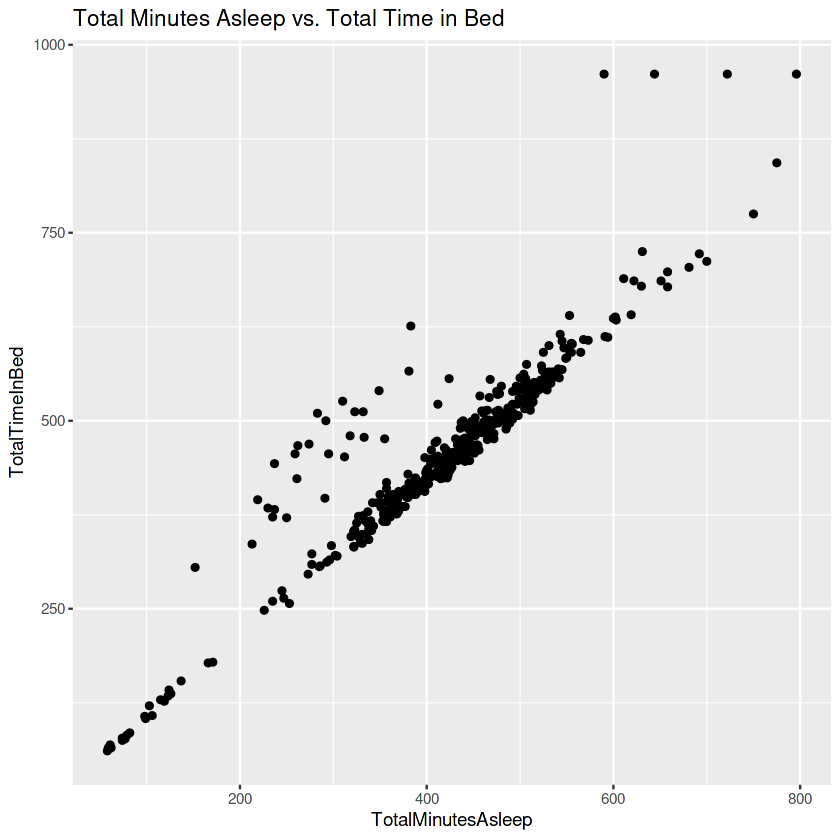

In [10]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

There is a gap between Total Time in Bed and Total Minute Asleep. People tend to **spend their time in bed using their phone nowaday a lot**. This happen to me all the time and I have been fighting this bad habit for awhile. Normally, before asleep and after waking up. *The recommendation is setting up a fix sleep time and let's body clock work*.

Next, let's dive in the **intensities data**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


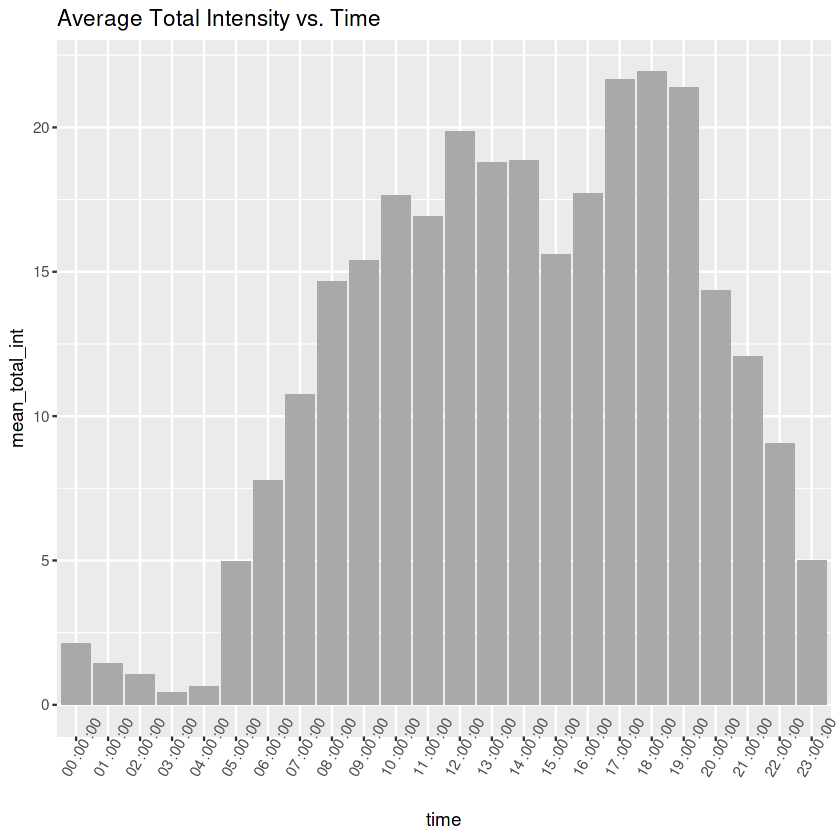

In [11]:
intensities_new <- intensities %>%
  group_by(time) %>%
  drop_na %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=intensities_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkgrey') + 
  theme(axis.text.x = element_text(angle = 60)) +
  labs(title="Average Total Intensity vs. Time")

As can be seen from the graph, the majority likely to be active in daytime, especially in the afternoon  from 3 p.m to 5p.m. Therefore, I suggest Bellabeat giving customers more ways to approach their interested in being active such as **home work-out articles**, **a motivation quote notification** in this time range. 

Let's find a patterns between **Sleep quality** and **Sedentary time**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



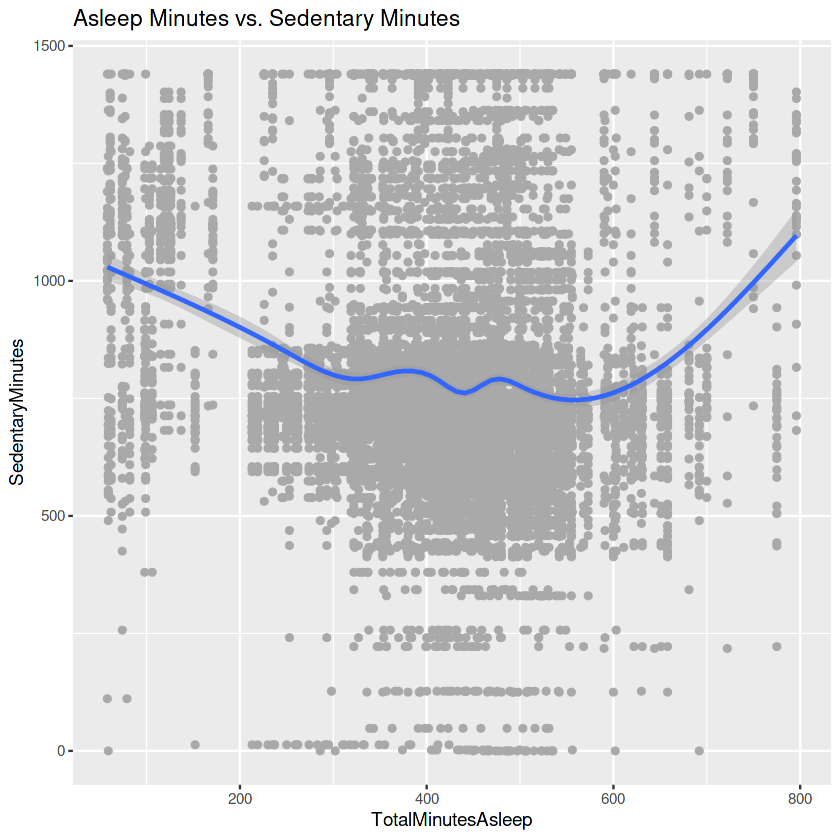

In [12]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + geom_point(color='darkgrey') +
  geom_smooth() + labs(title="Asleep Minutes vs. Sedentary Minutes")

It's not clearly to give a causation from the correlation result between Asleep Minutes vs. Sedentary. The trend is people seems sleeps less when they spend more time on sedentary on a day and it's not good for their health.

# Recommendation for the business

1. Due to Corona virus pandemic, people tend to stay home and spending time in seating more than usual. Therefore, marketing stategy should focus on different types of target such as student, professionals whose study and working at home. 
2. In the following, everyone spending more time on phone than before. It probably because of the pandemic or there are many entertain things on the phone nowadays such as social network and gaming. As a consequence, this habit reduce people's sleep quality daily whether or not High active or light active type. 
**In order to builing a good life-balance quality, Bellabeat can not directly impact to this daily over-using-phone problem, but it could be very helpful to clarify how it will negative effect by create some kind of function such as habit management which allow user to create their daily habit and time management in order to control and tracking their daily activities.**


*Thank you for your reading. This is my very first data analytics case study using R through Kaggle platform. I would appreciate any comment for improvement!!!*